In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
%config IPCpmpleter.greedy=True

In [5]:
train = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')
test = pd.read_csv('Data Mining VU data/test_set_VU_DM_2014.csv')

In [6]:
train_sample = train.sample(frac=0.5, random_state=0)
test_sample = train.drop(train_sample.index)

In [7]:
train_sample.booking_bool.sum()/train_sample.shape[0]

0

In [8]:
train.booking_bool.sum()/train.shape[0]

0

In [9]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [10]:
# number of different users
len(test.srch_id.unique())

199549

In [11]:
# numbers of different hotels
len(test.prop_id.unique())

129438

In [12]:
train.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [13]:
train.isna().sum()/train.shape[0]

srch_id                        0.000000
date_time                      0.000000
site_id                        0.000000
visitor_location_country_id    0.000000
visitor_hist_starrating        0.949204
visitor_hist_adr_usd           0.948977
prop_country_id                0.000000
prop_id                        0.000000
prop_starrating                0.000000
prop_review_score              0.001485
prop_brand_bool                0.000000
prop_location_score1           0.000000
prop_location_score2           0.219902
prop_log_historical_price      0.000000
position                       0.000000
price_usd                      0.000000
promotion_flag                 0.000000
srch_destination_id            0.000000
srch_length_of_stay            0.000000
srch_booking_window            0.000000
srch_adults_count              0.000000
srch_children_count            0.000000
srch_room_count                0.000000
srch_saturday_night_bool       0.000000
srch_query_affinity_score      0.935986


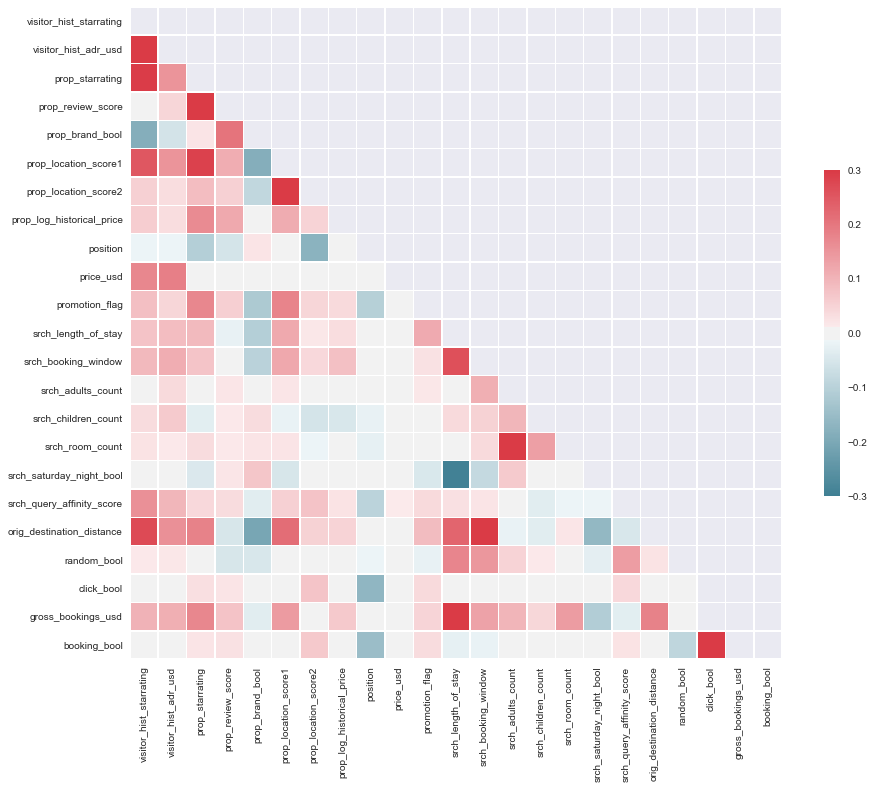

In [14]:
numerical_data_of_interest = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd','promotion_flag','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_saturday_night_bool','srch_query_affinity_score','orig_destination_distance','random_bool','click_bool','gross_bookings_usd','booking_bool']
# Compute the correlation matrix
#corr = train.drop(['srch_id','date_time','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id'], axis=1).corr()
corr = train[numerical_data_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
# check if test set contains other users than the training set
test_ids = set(test.srch_id.unique())
train_ids = set(train.srch_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' users in the test set overlap with the training set')

(119914, ' of ', 199549, ' users in the test set overlap with the training set')


In [16]:
# check if test set contains other hotels than the training set
test_ids = set(test.prop_id.unique())
train_ids = set(train.prop_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)
print(intersection_count, ' of ',len(test_ids),' hotels in the test set overlap with the training set')

(121665, ' of ', 129438, ' hotels in the test set overlap with the training set')


In [17]:
train[['booking_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='prop_id',ascending=False)

,prop_id,booking_bool
129112,140821,0.142857
129111,140820,0.000000
129110,140819,0.000000
129109,140818,0.000000
129108,140817,0.000000
129107,140816,0.102273
129106,140815,0.000000
129105,140814,0.000000
129104,140813,0.000000
129103,140812,0.000000


In [18]:
train[train['srch_destination_id']==3][['click_bool','prop_id']].groupby(['prop_id'], as_index=False).mean().sort_values(by='click_bool',ascending=False)

,prop_id,click_bool
0,1675,1
1,3080,0
2,23029,0
3,25247,0
4,39801,0
5,49779,0
6,67723,0
7,124081,0


In [19]:
train_sample['star_diff'] = np.abs(train_sample.visitor_hist_starrating - train_sample.prop_starrating)

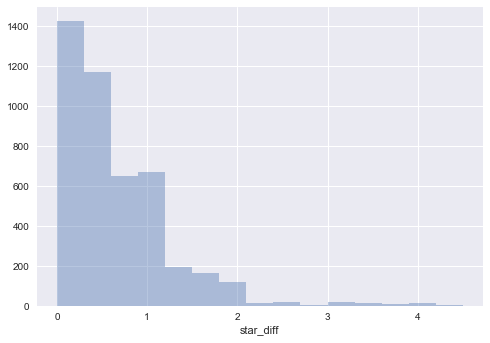

In [20]:
sns.distplot(train_sample.star_diff[train_sample.booking_bool == 1].dropna(), kde=False, bins=15)
#sns.distplot(train_sample.star_diff[train_sample.booking_bool == 1].dropna(), kde=False, bins=15)
plt.show()

In [21]:
train_sample['price_diff'] = np.abs(train_sample.visitor_hist_adr_usd - train_sample.price_usd)

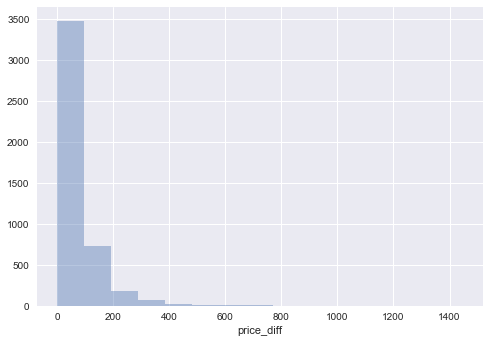

In [22]:
sns.distplot(train_sample.price_diff[train_sample.booking_bool == 1].dropna(), kde=False, bins=15)
plt.show()

In [24]:
#kmeans = KMeans(n_clusters=2, random_state=0).fit(train_sample[['']])
#kmeans.labels_

In [25]:
train.visitor_location_country_id.value_counts()

219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
158      44505
103      35286
132      32740
117      25973
50       19623
39       18430
215      16361
181      12549
98       12024
13       11935
32       11836
15       11501
205      10736
81        9934
4         9428
33        9109
56        9070
23        8632
14        8239
73        8031
        ...   
122         56
27          56
168         55
116         55
46          55
188         55
87          52
139         48
193         47
121         46
183         39
174         33
210         33
166         33
228         33
67          32
94          32
217         31
64          31
3           31
54          31
58          30
198         30
101         28
66          27
226         25
190         24
146         15
83          13
150          8
Name: visitor_location_country_id, Length: 210, dtype: int64

In [26]:
groups = train.groupby(['prop_country_id','site_id'])

In [27]:
groups.size().min()

1

In [28]:
groups.size()

prop_country_id  site_id
1                1             9
                 5            46
                 12            7
                 15            6
                 32            8
2                4            29
                 5          3378
                 7            78
                 9            28
                 12           31
                 14          561
                 15           31
                 16           68
                 18          111
                 19           28
                 25           93
                 28           29
                 31           30
4                1           142
                 2            32
                 4            20
                 5          7257
                 7           114
                 9            65
                 10         2585
                 11          202
                 12          334
                 13           31
                 14         1274
                 1

In [29]:
groups.apply(lambda x: x.visitor_hist_starrating.mean())

prop_country_id  site_id
1                1               NaN
                 5               NaN
                 12              NaN
                 15         3.470000
                 32         4.050000
2                4               NaN
                 5          3.551739
                 7               NaN
                 9          4.000000
                 12              NaN
                 14         4.000000
                 15         3.900000
                 16              NaN
                 18              NaN
                 19              NaN
                 25              NaN
                 28              NaN
                 31              NaN
4                1               NaN
                 2               NaN
                 4               NaN
                 5          3.230909
                 7          2.979464
                 9               NaN
                 10         3.871429
                 11         3.690000
             

In [31]:
# make families of children and adults

train_sample['family_size'] = train_sample['srch_children_count'] + train_sample['srch_adults_count']
train_sample.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,star_diff,price_diff,family_size
count,2.479174e+06,2.479174e+06,2.479174e+06,125769.000000,126339.000000,2.479174e+06,2.479174e+06,2.479174e+06,2.475445e+06,2.479174e+06,...,69263.000000,957777.000000,993323.000000,306519.000000,2.479174e+06,68914.000000,2.479174e+06,125769.000000,126339.000000,2.479174e+06
mean,1.664162e+05,9.954426e+00,1.753529e+02,3.373744,175.946134,1.739511e+02,7.004445e+04,3.180843e+00,3.777649e+00,6.345827e-01,...,19.509839,-0.060877,0.009881,22.857438,4.457493e-02,385.538921,2.779716e-02,0.810951,91.873129,2.323508e+00
std,9.609201e+04,7.649231e+00,6.590041e+01,0.692052,107.034483,6.835172e+01,4.061124e+04,1.050978e+00,1.050578e+00,4.815471e-01,...,53.405672,0.468766,0.203427,922.575042,2.063687e-01,921.529300,1.643913e-01,0.742619,118.520699,1.180282e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,8.298400e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.496700e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,7.000000,0.000000,0.000000,7.000000,0.000000e+00,123.992500,0.000000e+00,0.280000,27.040000,2.000000e+00
50%,1.665970e+05,5.000000e+00,2.190000e+02,3.450000,152.150000,2.190000e+02,6.958200e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,12.000000,0.000000,0.000000,11.000000,0.000000e+00,217.580000,0.000000e+00,0.640000,60.710000,2.000000e+00
75%,2.497130e+05,1.400000e+01,2.190000e+02,3.930000,213.140000,2.190000e+02,1.051230e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,20.000000,0.000000,0.000000,17.000000,0.000000e+00,429.797500,0.000000e+00,1.010000,116.740000,3.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,7776.000000,1.000000,1.000000,149400.000000,1.000000e+00,159292.380000,1.000000e+00,5.000000,5012.400000,1.600000e+01


In [ ]:
train_sample['family_bins'] = train_sample.family_size.apply(lambda x: 'alone' if x==1 else ('couple' if x==2 else ('small family' if x < 6 else 'large family')))


In [ ]:
#train['family_bins'].groupby(['family_bins'])
#train_sample.plot(x='family_bins', y='srch_length_of_stay', style='o')
#sns.boxplot(x='booking_bool', y='family_bins', data=train_sample)
sns.distplot(train_sample.srch_length_of_stay[train_sample.family_bins=='alone'].dropna(), label='alone')
#sns.distplot(train_sample.family_bins[train_sample.booking_bool==0].dropna(), label='not booked')
plt.legend()
plt.show()

In [ ]:
sns.lmplot('prop_starrating', 'prop_log_historical_price', data=train_sample, fit_reg=False)
#sns.kdeplot(train.prop_starrating, train.prop_log_historical_price)
#train.plot(x='prop_log_historical_price', y='prop_starrating', kind='bar')
plt.show()

In [ ]:
#train.display('prop_country_id')